# Developed by Jonathan Ojeda 1/4/2021

_**Functionalities:**_

 - Read nc files from nasapower API using _bestiapop_ Python package
 - Convert climate data from nasapower format to AgMERRA format and export it as 3D file

### NASA-POWER data description
NASA's goal in Earth science is to observe, understand, and model the Earth system to discover how it is changing, to better predict change, and to understand the consequences for life on Earth. The Applied Sciences Program, within the Science Mission Directorate (which replaced both the Office of Earth Science and the Office of Space Science), serves NASA and Society by expanding and accelerating the realization of societal and economic benefits from Earth science, information, and technology research and development.

The Prediction Of Worldwide Energy Resources (POWER) project was initiated to improve upon the current renewable energy data set and to create new data sets from new satellite systems. The POWER project targets three user communities: (1) Renewable Energy, (2) Sustainable Buildings, and (3) Agroclimatology. The Agroclimatology Archive is designed to provide web-based access to industry-friendly parameters formatted for input to crop models contained within agricultural DSS.

### What is the spatial resolution of the POWER data?

Bestiapop produces data from NASAPOWER at a 0.5&deg; x 0.5&deg; resolution however the original datasets have different spatial resolution accordingly with the variable.

- **Solar**: The data was initially produced on a 1&deg; x 1&deg; global grid and then re-gridded via data replication to a 0.5&deg; x 0.5&deg; latitude and longitude global grid.

- **Meteorology**: The data was initially produced on a 1/2&deg; x 2/3&deg; global grid and then re-gridded via bi-linearly interpolation to a 0.5&deg; x 0.5&deg; latitude and longitude global grid.

### What is the temporal resolution of the POWER data?

Bestiapop produces data at a daily step however the original datasets have different temporal resolution accordingly with the variable.

- **Solar**: The data was initially produced on 3-hourly time increments which are averaged to provide daily values. The daily averaged values are used to calculate climatologically averaged monthly values.

- **Meteorology**: The data was initially produced on 1-hourly time increments which are averaged to provided daily values. The daily averaged values are used to calculate climatologically averaged monthly values.

### Missing values

Solar daily data are typically missing because the satellite observational data are missing and irretrievable. Therefore, in the NASAPOWER data there are missing values for this variable which are represented by `-99`. It is a problem for crop models that works at daily step due to they have defined boundaries for climate variables, so they crashes if read `Nan` values. To solve this problem, BestiaPop automatically calculates the mean value between the previous and the following `NaN`value of the variable and replace the `NaN` with the calculated mean.

### Data request

Data request is limited to years after 1981.

### Climate Variables

One consideration is the name and number of variables in each data source (SILO vs NASAPOWER). They have different number of climate variables and names. Therefore, for a friendly use of BestiaPop with different data sources, we have defined generic variable names for global solar radiation, precipitation, maximum temperature and minimum temperature which are mandatory to create MET and WTH files for crop modelling purposes. Abbreviations of NASAPOWER variables and their corresponding variable names are provided below:

|Original Name|BestiaPop Name|Description|Unit|
|:--------------:|:---------------:|:------------:|:------------:|
|ALLSKY_SFC_SW_DWN|radiation|All Sky Insolation Incident on a Horizontal Surface|MJ m<sup>-2<sup>|
|PRECTOT|daily_rain|Precipitation|mm|
|T2M_MIN|min_temp|Minimum Temperature at 2 Meters |&deg;C |
|T2M_MAX|max_temp|Maximum Temperature at 2 Meters |&deg;C |

In [1]:
import numpy as np
import os
import pandas as pd
from bestiapop import bestiapop

#Extend screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Specify the corners of the tile/s, years, data source and data variables to bestiapop
Note: in this example we download data for tile 0026/0047 (pSIMS nomenclature) corresponding to South Indiana US across 10 years (2010-2020) from nasapower API.

In [8]:
action='generate-climate-file'
data_source='nasapower'
#minimum and maximum limits of the year range are included in the download
year_range='1981-2010'
climate_variables=['radiation', 'max_temp', 'min_temp', 'daily_rain']
lat_range=[38.25, 39.75]
lon_range=[-87.75, -86.25]
output_type='dataframe' # <-- selecting pandas dataframe as output of our data processing
output_path=None # <-- no dir since we are not dumping data to a file

## Run bestiapop

In [9]:
climate_data = bestiapop.CLIMATEBEAST(
    action=action,
    data_source=data_source,
    output_path=output_path,
    output_type=output_type,
    input_path=None,
    climate_variables=climate_variables,
    year_range=year_range,
    lat_range=lat_range,
    lon_range=lon_range,
    multiprocessing=None
    )

## Download data and create dataframe

In [10]:
data = climate_data.process_records(action)

2021-05-24 12:30:44 - POPBEAST - Extracting data and converting to dataframe format
2021-05-24 12:30:44 - POPBEAST.NASAPOWER_CONNECTOR - Generating DataFrames


Total Progress:   0%|                                                                            | 0/4 [00:00<?, ?it/s]

2021-05-24 12:30:44 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable radiation
2021-05-24 12:30:44 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1981
2021-05-24 12:30:44 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -87.75 for Year 1981
2021-05-24 12:30:44 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:44 - POPBEAST.NASAPOWER_CONNECTOR - Need to get data from the NASA Power Cloud
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -87.75 for Year 1982
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -87.75

2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2002
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -87.75 for Year 2002
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2003
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -87.75 for Year 2003
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -87.75 for Year 2004
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2

2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1994
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -87.75 for Year 1994
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1995
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -87.75 for Year 1995
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1996
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -87.75 for Year 1996
2021-05-24 12:30:51 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -87.75 for Year 1985
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1986
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -87.75 for Year 1986
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1987
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -87.75 for Year 1987
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1988
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2007
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -87.75 for Year 2007
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2008
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -87.75 for Year 2008
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2009
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -87.75 for Year 2009
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2010

2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -87.75 for Year 1998
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1999
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -87.75 for Year 1999
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2000
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -87.75 for Year 2000
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2001
2021-05-24 12:30:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -87.25 for Year 1989
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1990
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -87.25 for Year 1990
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1991
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -87.25 for Year 1991
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1992
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiat

2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable max_temp
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1981
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -87.25 for Year 1981
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -87.25 for Year 1982
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -87.25 for Year 1983
2021-05-24 12:30:58 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER 

2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2003
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -87.25 for Year 2003
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -87.25 for Year 2004
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2005
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -87.25 for Year 2005
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -87.25 for Year 1994
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1995
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -87.25 for Year 1995
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1996
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -87.25 for Year 1996
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1997
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1986
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -87.25 for Year 1986
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1987
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -87.25 for Year 1987
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1988
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -87.25 for Year 1988
2021-05-24 12:30:59 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NA

2021-05-24 12:31:00 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -87.25 for Year 2007
2021-05-24 12:31:00 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:00 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2008
2021-05-24 12:31:00 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -87.25 for Year 2008
2021-05-24 12:31:00 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:00 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2009
2021-05-24 12:31:00 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -87.25 for Year 2009
2021-05-24 12:31:00 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:00 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2010
2021-05-24 12:31:00 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

2021-05-24 12:31:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -86.75 for Year 1998
2021-05-24 12:31:06 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1999
2021-05-24 12:31:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -86.75 for Year 1999
2021-05-24 12:31:06 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2000
2021-05-24 12:31:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -86.75 for Year 2000
2021-05-24 12:31:06 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2001
2021-05-24 12:31:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiat

2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1990
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -86.75 for Year 1990
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1991
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -86.75 for Year 1991
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1992
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -86.75 for Year 1992
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -86.75 for Year 1981
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -86.75 for Year 1982
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -86.75 for Year 1983
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1984
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2003
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -86.75 for Year 2003
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -86.75 for Year 2004
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2005
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -86.75 for Year 2005
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2006

2021-05-24 12:31:08 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -86.75 for Year 1994
2021-05-24 12:31:08 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:08 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1995
2021-05-24 12:31:08 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -86.75 for Year 1995
2021-05-24 12:31:08 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:08 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1996
2021-05-24 12:31:08 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -86.75 for Year 1996
2021-05-24 12:31:08 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:08 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1997
2021-05-24 12:31:08 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

2021-05-24 12:31:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -86.25 for Year 1985
2021-05-24 12:31:13 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1986
2021-05-24 12:31:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -86.25 for Year 1986
2021-05-24 12:31:13 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1987
2021-05-24 12:31:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -86.25 for Year 1987
2021-05-24 12:31:13 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1988
2021-05-24 12:31:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiat

2021-05-24 12:31:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2007
2021-05-24 12:31:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -86.25 for Year 2007
2021-05-24 12:31:13 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2008
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -86.25 for Year 2008
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2009
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.25 - Lon -86.25 for Year 2009
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2

2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1999
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -86.25 for Year 1999
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2000
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -86.25 for Year 2000
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2001
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.25 - Lon -86.25 for Year 2001
2021-05-24 12:31:14 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -86.25 for Year 1990
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1991
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -86.25 for Year 1991
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1992
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.25 - Lon -86.25 for Year 1992
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1993
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -86.25 for Year 1982
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -86.25 for Year 1983
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1984
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -86.25 for Year 1984
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NA

2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -86.25 for Year 2003
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -86.25 for Year 2004
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2005
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.25 - Lon -86.25 for Year 2005
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2006
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

Total Progress:  25%|#################                                                   | 1/4 [00:32<01:37, 32.38s/it]

2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable radiation
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1981
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -87.75 for Year 1981
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:16 - POPBEAST.NASAPOWER_CONNECTOR - Need to get data from the NASA Power Cloud
2021-05-24 12:31:21 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:31:21 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -87.75 for Year 1982
2021-05-24 12:31:21 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:21 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:31:21 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -87.75

2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2002
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -87.75 for Year 2002
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2003
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -87.75 for Year 2003
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -87.75 for Year 2004
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2

2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1994
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -87.75 for Year 1994
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1995
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -87.75 for Year 1995
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1996
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -87.75 for Year 1996
2021-05-24 12:31:22 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -87.75 for Year 1985
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1986
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -87.75 for Year 1986
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1987
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -87.75 for Year 1987
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1988
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2007
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -87.75 for Year 2007
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2008
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -87.75 for Year 2008
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2009
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -87.75 for Year 2009
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2010

2021-05-24 12:31:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -87.75 for Year 1998
2021-05-24 12:31:24 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1999
2021-05-24 12:31:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -87.75 for Year 1999
2021-05-24 12:31:24 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2000
2021-05-24 12:31:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -87.75 for Year 2000
2021-05-24 12:31:24 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2001
2021-05-24 12:31:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

2021-05-24 12:31:30 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -87.25 for Year 1989
2021-05-24 12:31:30 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:30 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1990
2021-05-24 12:31:30 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -87.25 for Year 1990
2021-05-24 12:31:30 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:30 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1991
2021-05-24 12:31:30 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -87.25 for Year 1991
2021-05-24 12:31:30 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:30 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1992
2021-05-24 12:31:30 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiat

2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable max_temp
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1981
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -87.25 for Year 1981
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -87.25 for Year 1982
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -87.25 for Year 1983
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER 

2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2003
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -87.25 for Year 2003
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -87.25 for Year 2004
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2005
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -87.25 for Year 2005
2021-05-24 12:31:31 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -87.25 for Year 1994
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1995
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -87.25 for Year 1995
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1996
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -87.25 for Year 1996
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1997
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1986
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -87.25 for Year 1986
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1987
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -87.25 for Year 1987
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1988
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -87.25 for Year 1988
2021-05-24 12:31:32 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NA

2021-05-24 12:31:33 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -87.25 for Year 2007
2021-05-24 12:31:33 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:33 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2008
2021-05-24 12:31:33 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -87.25 for Year 2008
2021-05-24 12:31:33 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:33 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2009
2021-05-24 12:31:33 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -87.25 for Year 2009
2021-05-24 12:31:33 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:33 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2010
2021-05-24 12:31:33 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -86.75 for Year 1998
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1999
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -86.75 for Year 1999
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2000
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -86.75 for Year 2000
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2001
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiat

2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1990
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -86.75 for Year 1990
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1991
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -86.75 for Year 1991
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1992
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -86.75 for Year 1992
2021-05-24 12:31:39 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -86.75 for Year 1981
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -86.75 for Year 1982
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -86.75 for Year 1983
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1984
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2003
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -86.75 for Year 2003
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -86.75 for Year 2004
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2005
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -86.75 for Year 2005
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2006

2021-05-24 12:31:41 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -86.75 for Year 1994
2021-05-24 12:31:41 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:41 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1995
2021-05-24 12:31:41 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -86.75 for Year 1995
2021-05-24 12:31:41 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:41 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1996
2021-05-24 12:31:41 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -86.75 for Year 1996
2021-05-24 12:31:41 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:41 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1997
2021-05-24 12:31:41 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

2021-05-24 12:31:46 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -86.25 for Year 1985
2021-05-24 12:31:46 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:46 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1986
2021-05-24 12:31:46 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -86.25 for Year 1986
2021-05-24 12:31:46 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:46 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1987
2021-05-24 12:31:46 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -86.25 for Year 1987
2021-05-24 12:31:46 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:46 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1988
2021-05-24 12:31:46 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiat

2021-05-24 12:31:47 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2007
2021-05-24 12:31:47 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -86.25 for Year 2007
2021-05-24 12:31:47 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:47 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2008
2021-05-24 12:31:47 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -86.25 for Year 2008
2021-05-24 12:31:47 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:47 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2009
2021-05-24 12:31:47 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 38.75 - Lon -86.25 for Year 2009
2021-05-24 12:31:47 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:47 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2

2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1999
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -86.25 for Year 1999
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2000
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -86.25 for Year 2000
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2001
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 38.75 - Lon -86.25 for Year 2001
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -86.25 for Year 1990
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1991
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -86.25 for Year 1991
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1992
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 38.75 - Lon -86.25 for Year 1992
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1993
2021-05-24 12:31:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:31:49 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:49 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:31:49 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -86.25 for Year 1982
2021-05-24 12:31:49 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:49 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:31:49 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -86.25 for Year 1983
2021-05-24 12:31:49 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:49 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1984
2021-05-24 12:31:49 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -86.25 for Year 1984
2021-05-24 12:31:49 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NA

2021-05-24 12:31:49 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -86.25 for Year 2003
2021-05-24 12:31:49 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:31:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -86.25 for Year 2004
2021-05-24 12:31:50 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2005
2021-05-24 12:31:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 38.75 - Lon -86.25 for Year 2005
2021-05-24 12:31:50 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2006
2021-05-24 12:31:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

Total Progress:  50%|##################################                                  | 2/4 [01:05<01:05, 32.71s/it]

2021-05-24 12:31:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable radiation
2021-05-24 12:31:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1981
2021-05-24 12:31:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -87.75 for Year 1981
2021-05-24 12:31:50 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:50 - POPBEAST.NASAPOWER_CONNECTOR - Need to get data from the NASA Power Cloud
2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -87.75 for Year 1982
2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -87.75

2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2002
2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -87.75 for Year 2002
2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2003
2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -87.75 for Year 2003
2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -87.75 for Year 2004
2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:55 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2

2021-05-24 12:31:56 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:56 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1994
2021-05-24 12:31:56 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -87.75 for Year 1994
2021-05-24 12:31:56 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:56 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1995
2021-05-24 12:31:56 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -87.75 for Year 1995
2021-05-24 12:31:56 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:56 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1996
2021-05-24 12:31:56 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -87.75 for Year 1996
2021-05-24 12:31:56 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -87.75 for Year 1985
2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1986
2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -87.75 for Year 1986
2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1987
2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -87.75 for Year 1987
2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1988
2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2007
2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -87.75 for Year 2007
2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2008
2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -87.75 for Year 2008
2021-05-24 12:31:57 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2009
2021-05-24 12:31:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -87.75 for Year 2009
2021-05-24 12:31:58 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2010

2021-05-24 12:31:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -87.75 for Year 1998
2021-05-24 12:31:58 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1999
2021-05-24 12:31:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -87.75 for Year 1999
2021-05-24 12:31:58 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2000
2021-05-24 12:31:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -87.75 for Year 2000
2021-05-24 12:31:58 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:31:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2001
2021-05-24 12:31:58 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

2021-05-24 12:32:04 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -87.25 for Year 1989
2021-05-24 12:32:04 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:04 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1990
2021-05-24 12:32:04 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -87.25 for Year 1990
2021-05-24 12:32:04 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:04 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1991
2021-05-24 12:32:04 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -87.25 for Year 1991
2021-05-24 12:32:04 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:04 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1992
2021-05-24 12:32:04 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiat

2021-05-24 12:32:05 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable max_temp
2021-05-24 12:32:05 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1981
2021-05-24 12:32:05 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -87.25 for Year 1981
2021-05-24 12:32:05 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:05 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:32:05 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -87.25 for Year 1982
2021-05-24 12:32:05 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:05 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:32:05 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -87.25 for Year 1983
2021-05-24 12:32:05 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER 

2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2003
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -87.25 for Year 2003
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -87.25 for Year 2004
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2005
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -87.25 for Year 2005
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -87.25 for Year 1994
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1995
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -87.25 for Year 1995
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1996
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -87.25 for Year 1996
2021-05-24 12:32:06 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1997
2021-05-24 12:32:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:32:07 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1986
2021-05-24 12:32:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -87.25 for Year 1986
2021-05-24 12:32:07 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1987
2021-05-24 12:32:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -87.25 for Year 1987
2021-05-24 12:32:07 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1988
2021-05-24 12:32:07 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -87.25 for Year 1988
2021-05-24 12:32:07 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NA

2021-05-24 12:32:08 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -87.25 for Year 2007
2021-05-24 12:32:08 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:08 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2008
2021-05-24 12:32:08 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -87.25 for Year 2008
2021-05-24 12:32:08 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:08 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2009
2021-05-24 12:32:08 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -87.25 for Year 2009
2021-05-24 12:32:08 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:08 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2010
2021-05-24 12:32:08 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

2021-05-24 12:32:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -86.75 for Year 1998
2021-05-24 12:32:14 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1999
2021-05-24 12:32:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -86.75 for Year 1999
2021-05-24 12:32:14 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2000
2021-05-24 12:32:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -86.75 for Year 2000
2021-05-24 12:32:14 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2001
2021-05-24 12:32:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiat

2021-05-24 12:32:14 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1990
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -86.75 for Year 1990
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1991
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -86.75 for Year 1991
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1992
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -86.75 for Year 1992
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -86.75 for Year 1981
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -86.75 for Year 1982
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -86.75 for Year 1983
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1984
2021-05-24 12:32:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:32:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2003
2021-05-24 12:32:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -86.75 for Year 2003
2021-05-24 12:32:16 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:32:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -86.75 for Year 2004
2021-05-24 12:32:16 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2005
2021-05-24 12:32:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -86.75 for Year 2005
2021-05-24 12:32:16 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:16 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2006

2021-05-24 12:32:17 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -86.75 for Year 1994
2021-05-24 12:32:17 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:17 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1995
2021-05-24 12:32:17 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -86.75 for Year 1995
2021-05-24 12:32:17 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:17 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1996
2021-05-24 12:32:17 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -86.75 for Year 1996
2021-05-24 12:32:17 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:17 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1997
2021-05-24 12:32:17 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -86.25 for Year 1985
2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1986
2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -86.25 for Year 1986
2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1987
2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -86.25 for Year 1987
2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1988
2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiat

2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2007
2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -86.25 for Year 2007
2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2008
2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -86.25 for Year 2008
2021-05-24 12:32:23 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2009
2021-05-24 12:32:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.25 - Lon -86.25 for Year 2009
2021-05-24 12:32:24 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2

2021-05-24 12:32:24 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1999
2021-05-24 12:32:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -86.25 for Year 1999
2021-05-24 12:32:24 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2000
2021-05-24 12:32:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -86.25 for Year 2000
2021-05-24 12:32:24 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2001
2021-05-24 12:32:24 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.25 - Lon -86.25 for Year 2001
2021-05-24 12:32:24 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:32:25 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -86.25 for Year 1990
2021-05-24 12:32:25 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:25 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1991
2021-05-24 12:32:25 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -86.25 for Year 1991
2021-05-24 12:32:25 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:25 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1992
2021-05-24 12:32:25 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.25 - Lon -86.25 for Year 1992
2021-05-24 12:32:25 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:25 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1993
2021-05-24 12:32:25 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:32:26 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:26 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:32:26 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -86.25 for Year 1982
2021-05-24 12:32:26 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:26 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:32:26 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -86.25 for Year 1983
2021-05-24 12:32:26 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:26 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1984
2021-05-24 12:32:26 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -86.25 for Year 1984
2021-05-24 12:32:26 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NA

2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -86.25 for Year 2003
2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -86.25 for Year 2004
2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2005
2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.25 - Lon -86.25 for Year 2005
2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2006
2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

Total Progress:  75%|###################################################                 | 3/4 [01:43<00:34, 34.16s/it]

2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable radiation
2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1981
2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -87.75 for Year 1981
2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:27 - POPBEAST.NASAPOWER_CONNECTOR - Need to get data from the NASA Power Cloud
2021-05-24 12:32:36 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:32:36 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -87.75 for Year 1982
2021-05-24 12:32:36 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:36 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:32:36 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -87.75

2021-05-24 12:32:37 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2002
2021-05-24 12:32:37 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -87.75 for Year 2002
2021-05-24 12:32:37 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:37 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2003
2021-05-24 12:32:37 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -87.75 for Year 2003
2021-05-24 12:32:37 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:37 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:32:37 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -87.75 for Year 2004
2021-05-24 12:32:37 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:37 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2

2021-05-24 12:32:38 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:38 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1994
2021-05-24 12:32:38 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -87.75 for Year 1994
2021-05-24 12:32:38 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:38 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1995
2021-05-24 12:32:38 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -87.75 for Year 1995
2021-05-24 12:32:38 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:38 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1996
2021-05-24 12:32:38 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -87.75 for Year 1996
2021-05-24 12:32:38 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:32:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -87.75 for Year 1985
2021-05-24 12:32:39 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1986
2021-05-24 12:32:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -87.75 for Year 1986
2021-05-24 12:32:39 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1987
2021-05-24 12:32:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -87.75 for Year 1987
2021-05-24 12:32:39 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1988
2021-05-24 12:32:39 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:32:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2007
2021-05-24 12:32:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -87.75 for Year 2007
2021-05-24 12:32:40 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2008
2021-05-24 12:32:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -87.75 for Year 2008
2021-05-24 12:32:40 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2009
2021-05-24 12:32:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -87.75 for Year 2009
2021-05-24 12:32:40 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:40 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2010

2021-05-24 12:32:41 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -87.75 for Year 1998
2021-05-24 12:32:41 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:41 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1999
2021-05-24 12:32:41 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -87.75 for Year 1999
2021-05-24 12:32:41 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:41 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2000
2021-05-24 12:32:41 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -87.75 for Year 2000
2021-05-24 12:32:41 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:41 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2001
2021-05-24 12:32:41 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

2021-05-24 12:32:47 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -87.25 for Year 1989
2021-05-24 12:32:47 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:47 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1990
2021-05-24 12:32:47 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -87.25 for Year 1990
2021-05-24 12:32:47 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:47 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1991
2021-05-24 12:32:47 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -87.25 for Year 1991
2021-05-24 12:32:47 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:47 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1992
2021-05-24 12:32:47 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiat

2021-05-24 12:32:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for climate variable max_temp
2021-05-24 12:32:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1981
2021-05-24 12:32:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -87.25 for Year 1981
2021-05-24 12:32:48 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:32:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -87.25 for Year 1982
2021-05-24 12:32:48 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:32:48 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -87.25 for Year 1983
2021-05-24 12:32:48 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER 

2021-05-24 12:32:49 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:49 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2003
2021-05-24 12:32:49 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -87.25 for Year 2003
2021-05-24 12:32:49 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:49 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:32:49 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -87.25 for Year 2004
2021-05-24 12:32:49 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:49 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2005
2021-05-24 12:32:49 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -87.25 for Year 2005
2021-05-24 12:32:49 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:32:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -87.25 for Year 1994
2021-05-24 12:32:50 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1995
2021-05-24 12:32:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -87.25 for Year 1995
2021-05-24 12:32:50 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1996
2021-05-24 12:32:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -87.25 for Year 1996
2021-05-24 12:32:50 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1997
2021-05-24 12:32:50 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:32:51 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1986
2021-05-24 12:32:51 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -87.25 for Year 1986
2021-05-24 12:32:51 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1987
2021-05-24 12:32:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -87.25 for Year 1987
2021-05-24 12:32:52 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1988
2021-05-24 12:32:52 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -87.25 for Year 1988
2021-05-24 12:32:52 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NA

2021-05-24 12:32:53 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -87.25 for Year 2007
2021-05-24 12:32:53 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:53 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2008
2021-05-24 12:32:53 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -87.25 for Year 2008
2021-05-24 12:32:53 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:53 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2009
2021-05-24 12:32:53 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -87.25 for Year 2009
2021-05-24 12:32:53 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:53 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2010
2021-05-24 12:32:53 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

2021-05-24 12:32:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -86.75 for Year 1998
2021-05-24 12:32:59 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1999
2021-05-24 12:32:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -86.75 for Year 1999
2021-05-24 12:32:59 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2000
2021-05-24 12:32:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -86.75 for Year 2000
2021-05-24 12:32:59 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:32:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2001
2021-05-24 12:32:59 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiat

2021-05-24 12:33:00 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:00 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1990
2021-05-24 12:33:00 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -86.75 for Year 1990
2021-05-24 12:33:00 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:00 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1991
2021-05-24 12:33:00 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -86.75 for Year 1991
2021-05-24 12:33:00 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:00 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1992
2021-05-24 12:33:00 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -86.75 for Year 1992
2021-05-24 12:33:00 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:33:01 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -86.75 for Year 1981
2021-05-24 12:33:01 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:01 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:33:01 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -86.75 for Year 1982
2021-05-24 12:33:01 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:01 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:33:01 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -86.75 for Year 1983
2021-05-24 12:33:01 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:01 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1984
2021-05-24 12:33:01 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:33:02 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2003
2021-05-24 12:33:02 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -86.75 for Year 2003
2021-05-24 12:33:02 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:02 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:33:02 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -86.75 for Year 2004
2021-05-24 12:33:02 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:02 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2005
2021-05-24 12:33:02 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -86.75 for Year 2005
2021-05-24 12:33:02 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:02 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2006

2021-05-24 12:33:03 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -86.75 for Year 1994
2021-05-24 12:33:03 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:03 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1995
2021-05-24 12:33:03 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -86.75 for Year 1995
2021-05-24 12:33:03 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:03 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1996
2021-05-24 12:33:03 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -86.75 for Year 1996
2021-05-24 12:33:03 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:03 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1997
2021-05-24 12:33:03 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

2021-05-24 12:33:09 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -86.25 for Year 1985
2021-05-24 12:33:09 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:09 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1986
2021-05-24 12:33:09 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -86.25 for Year 1986
2021-05-24 12:33:09 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:09 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1987
2021-05-24 12:33:09 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -86.25 for Year 1987
2021-05-24 12:33:09 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:09 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1988
2021-05-24 12:33:09 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiat

2021-05-24 12:33:10 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2007
2021-05-24 12:33:10 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -86.25 for Year 2007
2021-05-24 12:33:10 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:10 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2008
2021-05-24 12:33:10 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -86.25 for Year 2008
2021-05-24 12:33:10 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:10 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2009
2021-05-24 12:33:10 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable radiation - Lat 39.75 - Lon -86.25 for Year 2009
2021-05-24 12:33:10 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:10 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2

2021-05-24 12:33:11 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:11 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1999
2021-05-24 12:33:11 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -86.25 for Year 1999
2021-05-24 12:33:11 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:11 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2000
2021-05-24 12:33:11 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -86.25 for Year 2000
2021-05-24 12:33:11 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:11 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2001
2021-05-24 12:33:11 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable max_temp - Lat 39.75 - Lon -86.25 for Year 2001
2021-05-24 12:33:11 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POW

2021-05-24 12:33:12 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -86.25 for Year 1990
2021-05-24 12:33:12 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:12 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1991
2021-05-24 12:33:12 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -86.25 for Year 1991
2021-05-24 12:33:12 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:12 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1992
2021-05-24 12:33:12 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp - Lat 39.75 - Lon -86.25 for Year 1992
2021-05-24 12:33:12 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:12 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1993
2021-05-24 12:33:12 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable min_temp 

2021-05-24 12:33:13 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1982
2021-05-24 12:33:13 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -86.25 for Year 1982
2021-05-24 12:33:13 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1983
2021-05-24 12:33:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -86.25 for Year 1983
2021-05-24 12:33:14 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 1984
2021-05-24 12:33:14 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -86.25 for Year 1984
2021-05-24 12:33:14 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NA

2021-05-24 12:33:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -86.25 for Year 2003
2021-05-24 12:33:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2004
2021-05-24 12:33:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -86.25 for Year 2004
2021-05-24 12:33:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2005
2021-05-24 12:33:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable daily_rain - Lat 39.75 - Lon -86.25 for Year 2005
2021-05-24 12:33:15 - POPBEAST.NASAPOWER_CONNECTOR - Extracting data from NASA POWER Climate DataBase
2021-05-24 12:33:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing data for year 2006
2021-05-24 12:33:15 - POPBEAST.NASAPOWER_CONNECTOR - Processing Variable dai

Total Progress: 100%|####################################################################| 4/4 [02:31<00:00, 37.79s/it]


## Explore 2D dataframe
Note: data from nasapower has 0.05 degree resolution and include DOY=366

In [11]:
data.head()

,lon,lat,year,day,radn,maxt,mint,rain
0,-87.75,38.25,1981,1,0.0,3.24,-3.58,0.02
1,-87.75,38.25,1981,2,0.0,3.40,-4.52,0.00
2,-87.75,38.25,1981,3,0.0,3.08,-9.52,0.01
3,-87.75,38.25,1981,4,0.0,-6.51,-12.61,0.00
4,-87.75,38.25,1981,5,0.0,-2.50,-13.41,0.16


In [12]:
data.year.unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010], dtype=int64)

In [13]:
#export data for analysis
data.to_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\data\test\nasapower.csv')

## Re-arrange dataframe before to create xarray

In [65]:
#change column name and add new time column
data.rename(columns={'day':'jday'}, inplace=True)
data['hour']=1200
import datetime
data['time'] = pd.to_datetime(data['year'],format='%Y') + pd.to_timedelta(data['jday'],unit='D') -  pd.to_timedelta('1D') + pd.to_timedelta(data['hour']/100,unit='h') + pd.to_timedelta(data['hour']%100,unit='m')

#set index before to convert to xarray
data11 = data.set_index(['time','lat','lon'])

#From 2D dataframe to xarray
data12 = data11.to_xarray()

#add attributes to xarray
data12.attrs['Author'] = 'Jonathan Ojeda'
data12.attrs['History'] = 'climate data converted from nasa-power (downloaded with bestiapop) to AgMERRA for pSIMS'

#rename variables from bestiapop format to agmerra format
data12['pr'] = data12['rain']
data12 = data12.drop(['rain'])

data12['rsds'] = data12['radn']
data12 = data12.drop(['radn'])

data12['tasmax'] = data12['maxt']
data12 = data12.drop(['maxt'])

data12['tasmin'] = data12['mint']
data12 = data12.drop(['mint','hour','year','jday'])

## Change units and add new variable `wind` to match agmerra format
Note: the `wind` variable is not used by APSIM

In [66]:
#change unit names
data12['pr'] = data12.pr.assign_attrs(units='mm/day')
data12['tasmax'] = data12.tasmax.assign_attrs(units='degreesc')
data12['tasmin'] = data12.tasmin.assign_attrs(units='degreesc')
data12['rsds'] = data12.rsds.assign_attrs(units='mj/m2')

#create wind variable (wrong numbers) to match psims2met.py format. Note the variable is not used for pSIMS purposes
data13 = data12.assign(wind=lambda x: x.tasmax * 0)
data13['wind'] = data13.wind.assign_attrs(units='m/s')
data13

<xarray.Dataset>
Dimensions:  (lat: 4, lon: 4, time: 3652)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01T12:00:00 ... 2019-12-31T12:00:00
  * lat      (lat) float64 38.25 38.75 39.25 39.75
  * lon      (lon) float64 -87.75 -87.25 -86.75 -86.25
Data variables:
    year     (time, lat, lon) int64 2010 2010 2010 2010 ... 2019 2019 2019 2019
    jday     (time, lat, lon) int64 1 1 1 1 1 1 1 ... 365 365 365 365 365 365
    pr       (time, lat, lon) float64 0.01 0.0 0.0 0.0 ... 0.03 0.07 0.12 0.17
    rsds     (time, lat, lon) float64 9.78 9.78 9.55 9.55 ... 2.57 2.25 2.25
    tasmax   (time, lat, lon) float64 -4.95 -4.99 -4.45 -3.62 ... 1.24 0.98 0.94
    tasmin   (time, lat, lon) float64 -10.04 -9.72 -9.4 ... -2.41 -2.26 -2.22
    wind     (time, lat, lon) float64 -0.0 -0.0 -0.0 -0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    Author:   Jonathan Ojeda
    History:  climate data converted from nasa-power to agmerra format to be ...

## Explore data for DOY=366 in a given year

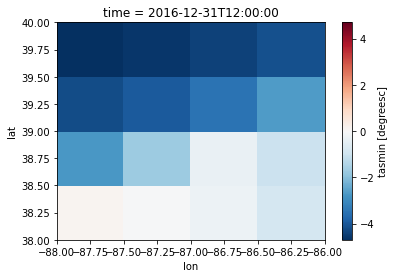

In [67]:
data13.tasmin[2556,0:,0:].plot(yincrease=True, x='lon', y='lat')

## Write nc4 file

In [68]:
data13.to_netcdf(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\data\test\nasapower\pSIMS\clim_0026_0047.tile.nc4')